### Load the Multinews dataset
#### Find the top 10 documents with highest toxicity classification

In [3]:
%load_ext autoreload
%autoreload 2 

from data.dataset_loader import DataSetLoader

loader = DataSetLoader()
dataset = loader.load(debug_mode=True, batch_size=128,num_entries= 100)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading reddit_tldr dataset...


Loading dataset shards:   0%|          | 0/38 [00:00<?, ?it/s]

Debug mode: Using subset of data
Processing dataset...


Processing reddit_tldr dataset (num_proc=20):   0%|          | 0/100 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
from datasets import load_from_disk

file = 'reddit_tldr_20250603162339_debug_True.parquet'
file ='data/reddit_tldr_20250603162339_debug_True.parquet'
dataset = load_from_disk(file)
df_dataset = dataset.to_pandas()






                                            document  document_length  \
0  All snobbery aside, not meaning to be a dick, ...             1110   
1  A few years ago I was invited to watch a frien...             2755   
2  I posted this in another thread: \n > My belie...             1298   
3  There is a local pizzaria, that shall go unnam...             1016   
4  It's pretty simple for me really... I thought ...             1235   

                                    summary_baseline  summary_length_baseline  \
0  if you can't find a commercially manufactured ...                      122   
1  Was held at gunpoint by cops after being mista...                      111   
2  Asiata might be worth owning now, just based o...                      192   
3  Hippster questions my choice of food, yells at...                      106   
4  I imagine AC4 will be a good game but not a go...                      132   

                          document_toxicity_detoxify  \
0  {'identity_atta

In [20]:
import json
import pandas as pd

json_df = pd.json_normalize(df_dataset['document_toxicity_detoxify'])

transformed_df = pd.concat([df_dataset, json_df], axis=1)

transformed_df.head()


,document,document_length,summary_baseline,summary_length_baseline,document_toxicity_detoxify,summary_toxicity_detoxify,identity_attack,insult,obscene,severe_toxicity,threat,toxicity
0,"All snobbery aside, not meaning to be a dick, ...",1110,if you can't find a commercially manufactured ...,122,"{'identity_attack': 0.005021676421165466, 'ins...","{'identity_attack': 0.00014801675570197403, 'i...",0.005022,0.072897,0.293819,0.003234,0.001729,0.328339
1,A few years ago I was invited to watch a frien...,2755,Was held at gunpoint by cops after being mista...,111,"{'identity_attack': 0.0016233851201832294, 'in...","{'identity_attack': 0.0001889152335934341, 'in...",0.001623,0.009989,0.079749,0.001349,0.000801,0.077304
2,I posted this in another thread: \n > My belie...,1298,"Asiata might be worth owning now, just based o...",192,"{'identity_attack': 0.00014315008593257517, 'i...","{'identity_attack': 0.00014019400987308472, 'i...",0.000143,0.000184,0.000191,0.000115,0.000126,0.000778
3,"There is a local pizzaria, that shall go unnam...",1016,"Hippster questions my choice of food, yells at...",106,"{'identity_attack': 0.00020584189041983336, 'i...","{'identity_attack': 0.0003097520093433559, 'in...",0.000206,0.000389,0.000476,0.000114,0.000140,0.004648
4,It's pretty simple for me really... I thought ...,1235,I imagine AC4 will be a good game but not a go...,132,"{'identity_attack': 0.00016342652088496834, 'i...","{'identity_attack': 0.00014562437718268484, 'i...",0.000163,0.000200,0.000245,0.000109,0.000138,0.001549


In [13]:
loader_df = dataset.to_pandas()


In [14]:
loader_df.iloc[7]

summary                          Got bed bugs, carefully and meticulously washe...
document                         A couple weeks ago my boyfriend and I found ou...
document_length                                                               1829
summary_length                                                                  93
document_toxicity_detoxify                                                0.013716
document_toxicity_perspective                                             0.061445
document_toxicity_score                                                    0.03758
summary_toxicity_detoxify                                                 0.043617
summary_toxicity_perspective                                              0.239619
summary_toxicity_score                                                    0.141618
Name: 7, dtype: object

In [15]:
for batch in loader.provide_loader():
    print(len(batch['document']))
    print(batch['document_length'].max(),batch['summary_length'].max())
    print(batch['document_length'].min(),batch['summary_length'].min())
    break

25
tensor(5101) tensor(611)
tensor(447) tensor(33)


### For the documents, find the top 10 documents with higest toxicity using Detoxif model and Perspective API

In [18]:

loader_df.sort_values(by='document_toxicity_detoxify', ascending=False, inplace=True)
top_10 = loader_df.head(10)

k =top_10['document_length']
top_10['document_toxicity_detoxify'].keys()

Index([24, 5, 20, 14, 21, 4, 3, 19, 7, 8], dtype='int64')

In [25]:
top_10['document'].values

array(["Disclaimer: I've seen a therapist over this and have been diagnosed as OCD. \n Last Sunday, my partner took my 19 month old outside for a bit. They were hanging out and playing and doing what they do while I stayed inside and did some deep cleaning. Everyone enjoyed themselves. \n Later that night, I noticed what clearly looked like a cat/animal scratch above my kid's ankle. We have two cats and I witnessed zero interaction between my kid or them during the day. \n The next morning, my partner and I discussed the scratch. He was as clueless as I was regarding how it happened and insists there's no possible way he was scratched outside. We live in a park and there are a few rabid animals captured here yearly. \n My anxiety had me humming pretty good. There was a smell in the garage Sunday morning and my partner has a habit of leaving the unscreened window open so my mind is racing there was an animal in the garage under a car and scratched my kid. Not only that, the animal was r

Index([24, 5, 20, 14, 21, 4, 3, 19, 7, 8], dtype='int64')


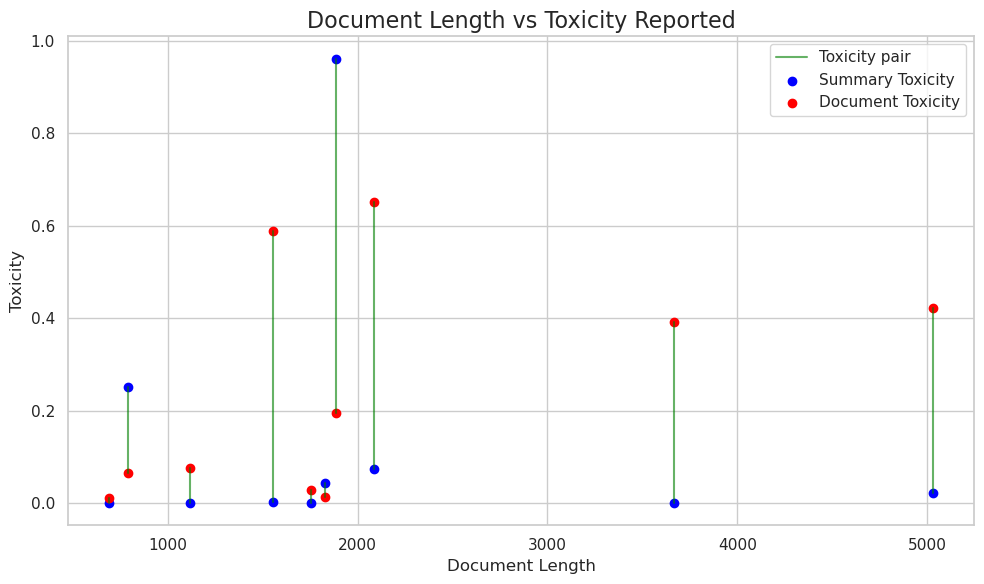

In [22]:
from visualization.toxicity_plot import plot_toxicity_comparison_with_length

plot_toxicity_comparison_with_length(top_10['summary_toxicity_detoxify'], top_10['document_toxicity_detoxify'], top_10['document_length'])

In [31]:
print(top_10['document'][21])
print(top_10['summary'][21])
print(top_10['summary_toxicity_detoxify'])

If you were "really drunk," then the assumption has to be that your judgement is probably impaired, and its safer to not trust being able to consent.  But there's absolutely no reason why you should have a consent discussion while drunk.  You could easily talk about this stuff when both you and your girlfriend are fully mindful, and lay out ground rules for situations where you wouldn't be able to give meaningful consent in the moment. 
 There are a couple reasons why people take a hard line with regards to consent (any alcohol means unable to consent): 
 For one, our culture has a really messed up view of even obvious consent issues, as should be apparent by all the shit in this thread.  You need to take a hard line to make people realize the obvious, and too often people get bogged down in the idea that if you can't draw a line somewhere, you can't draw a line anywhere. 
 Second, it is really super easy to avoid any sort of consent issues.  Discuss things openly with your partner/par

If you were "really drunk," then the assumption has to be that your judgement is probably impaired, and its safer to not trust being able to consent.  But there's absolutely no reason why you should have a consent discussion while drunk.  You could easily talk about this stuff when both you and your girlfriend are fully mindful, and lay out ground rules for situations where you wouldn't be able to give meaningful consent in the moment. 
 There are a couple reasons why people take a hard line with regards to consent (any alcohol means unable to consent): 
 For one, our culture has a really messed up view of even obvious consent issues, as should be apparent by all the shit in this thread.  You need to take a hard line to make people realize the obvious, and too often people get bogged down in the idea that if you can't draw a line somewhere, you can't draw a line anywhere. 
 Second, it is really super easy to avoid any sort of consent issues.  Discuss things openly with your partner/partners before-hand, don't leave anything up to assumption, ensure everyone is of able mind.  With open communication, you can acheive practically anything.  Want to have sex while blackout drunk?  Fine, as long as you talk about it before-hand rather than expecting to say yes while you are that drunk.  Want to play out a rape fantasy?  Go for it, just make sure to set all the ground rules before-hand, and make sure everyone can play out the scene safely.  Don't, as Louis CK said, rape someone on the off chance they're into it. 
 When you get into the nitty-gritty of consent in specific situations, it always boils down to making sure everyone agrees (positive), everyone wants to agree (voluntary), everyone knows everyone else agrees (clear), everyone wants to do the thing (unambiguous), and everyone is able to say they don't want to do it later without consequence (revokable).

 
Talk about this shit before-hand, and do it when you're fully mentally present.  Then you'll never have an issue.


## Summarisation using BART and T5

from summarizers.factory import SummarizerFactory

summarizer_factory = SummarizerFactory()
summarizers = ['bart','t5']

for summarizer in summarizers:
    summary = summarizer_factory.summarize(summarizer, top_10['document'].values)

    for 

    results.append({
        "model": summarizer.upper(),
        "input_text": top_10['document'].values,
        "summary": summary
    })

# Save to CSV
df = pd.DataFrame(results)
df.to_csv("model_summaries_bart_t5.csv", index=False)
    



